# ACME Happy Customer Survey Classification

ACME is one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges. At ACME we thrive for making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions. Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels. We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.

Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers X1 = my order was delivered on time X2 = contents of my order was as I expected X3 = I ordered everything I wanted to order X4 = I paid a good price for my order X5 = I am satisfied with my courier X6 = the app makes ordering easy for me

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Success Metrics:

Reach 73% accuracy score or above, or convince us why your solution is superior. We are definitely interested in every solution and insight you can provide us.

Try to submit your working solution as soon as possible. The sooner the better.

## Part 1: Data Wrangling, Cleaning, and EDA

To begin, import the desired libraries for importing our data, check to see if it is clean, and then exploratory data analysis. Then we will look into what model is best for the test data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pycaret.classification import *
import itertools
import warnings

sns.set(palette='muted',style='whitegrid')
warnings.filterwarnings("ignore")

# import our customer survey data. Remember that 'Y' is the variable we are trying to predict based off of, 'X1'-'X6.'
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [2]:
# checking for nan or null values
def show_na(df):
    na_df = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    na_df.columns=['count', '%']
    na_df.sort_values(by='count', ascending = False)
    return na_df
show_na(df)

,count,%
Y,0,0.0
X1,0,0.0
X2,0,0.0
X3,0,0.0
X4,0,0.0
X5,0,0.0
X6,0,0.0


In [3]:
# Great, there are no missing values. Let's see the amount of data we are working.
df.shape

(126, 7)

Text(0.5, 1.05, 'Correlation of Features')

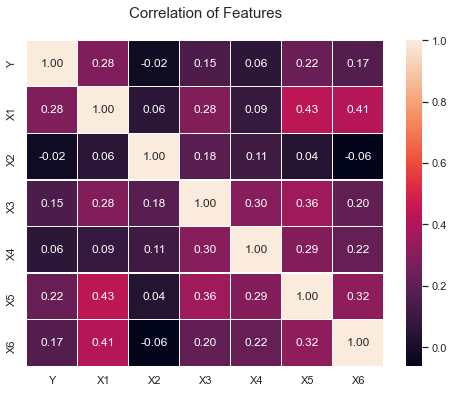

In [4]:
# Not much! We are going to have to get creative. Now let us see what  
corr= df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.2f', linewidths=.30)
plt.title('Correlation of Features', y=1.05, size=15)

In [5]:
# Setting up PyCaret
data = df
data_unseen = df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))

Data for Modeling: (126, 7)


In [6]:
# PyCaret will read our dataset and then inform us what it believes to be the target type (Y).
# PyCaret will also share the default parameters for the model.
df_clf = setup(data=data, target='Y', session_id=123)

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(126, 7)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
# Tell PyCaret to store the best performing models in variable 'best_models'
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6736,0.6869,0.8400,0.6838,0.7467,0.3005,0.3215,0.0070
xgboost,Extreme Gradient Boosting,0.6500,0.6792,0.6833,0.6988,0.6838,0.2830,0.2867,0.0990
rf,Random Forest Classifier,0.6056,0.6719,0.7433,0.6315,0.6771,0.1600,0.1793,0.0530
dt,Decision Tree Classifier,0.6014,0.5858,0.6833,0.6540,0.6590,0.1746,0.1851,0.0040
ridge,Ridge Classifier,0.5931,0.0000,0.7400,0.6000,0.6584,0.1334,0.1619,0.0040
lr,Logistic Regression,0.5819,0.6053,0.7200,0.5952,0.6478,0.1115,0.1337,0.3460
lda,Linear Discriminant Analysis,0.5819,0.5642,0.7033,0.6152,0.6533,0.1242,0.1331,0.0040
svm,SVM - Linear Kernel,0.5806,0.0000,0.6833,0.6328,0.6342,0.0986,0.1060,0.0050
qda,Quadratic Discriminant Analysis,0.5806,0.0667,0.9667,0.5939,0.7266,0.0308,0.0316,0.0050
lightgbm,Light Gradient Boosting Machine,0.5806,0.6664,0.6600,0.6138,0.6295,0.1267,0.1367,0.0080


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
# KNN is our best performer, let's start there.
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9444,1.0000,0.8571,0.9231,0.7273,0.7559
1,0.5556,0.4500,0.6000,0.6000,0.6000,0.1000,0.1000
2,0.5556,0.6000,0.8000,0.5714,0.6667,0.0526,0.0598
3,0.4444,0.5750,0.6000,0.5000,0.5455,-0.1538,-0.1581
4,0.7778,0.8000,1.0000,0.7143,0.8333,0.5263,0.5976
5,0.6667,0.7500,0.8000,0.6667,0.7273,0.3077,0.3162
6,0.4444,0.2500,0.8000,0.5000,0.6154,-0.2162,-0.3162
7,0.7778,1.0000,1.0000,0.7143,0.8333,0.5263,0.5976
8,0.7500,0.6667,1.0000,0.7143,0.8333,0.3846,0.4880
9,0.8750,0.8333,0.8000,1.0000,0.8889,0.7500,0.7746


In [10]:
# lets fine tune knn to see if we can get anymore accuracy
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [11]:
# check the performance of the expanded grid.
tuned_knn = tune_model(knn, custom_grid={'n_neighbors': np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.6667,1.0000,0.7500,0.8571,0.4000,0.5000
1,0.4444,0.2000,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.7778,0.8750,1.0000,0.7143,0.8333,0.5263,0.5976
3,0.6667,0.5250,0.8000,0.6667,0.7273,0.3077,0.3162
4,0.6667,0.7500,0.8000,0.6667,0.7273,0.3077,0.3162
5,0.6667,0.8500,1.0000,0.6250,0.7692,0.2703,0.3953
6,0.4444,0.4750,0.8000,0.5000,0.6154,-0.2162,-0.3162
7,0.6667,0.7000,1.0000,0.6250,0.7692,0.2703,0.3953
8,0.7500,0.6667,1.0000,0.7143,0.8333,0.3846,0.4880
9,0.5000,0.8000,0.8000,0.5714,0.6667,-0.2308,-0.2928


In [12]:
# knn actually performed worse. Lets look at xgboost and RandomForest then.
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8333,0.8333,0.8333,0.8333,0.5000,0.5000
1,0.4444,0.4500,0.4000,0.5000,0.4444,-0.0976,-0.1000
2,0.6667,0.6000,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.6667,0.7000,0.6000,0.7500,0.6667,0.3415,0.3500
4,0.7778,0.9500,0.8000,0.8000,0.8000,0.5500,0.5500
5,0.5556,0.7000,0.4000,0.6667,0.5000,0.1429,0.1581
6,0.5556,0.3750,0.6000,0.6000,0.6000,0.1000,0.1000
7,0.5556,0.6500,0.8000,0.5714,0.6667,0.0526,0.0598
8,0.7500,0.6667,0.8000,0.8000,0.8000,0.4667,0.4667
9,0.7500,0.8667,0.8000,0.8000,0.8000,0.4667,0.4667


In [13]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7778,1.0000,0.6667,0.8000,0.0000,0.0000
1,0.5556,0.4000,1.0000,0.5556,0.7143,0.0000,0.0000
2,0.6667,0.9000,1.0000,0.6250,0.7692,0.2703,0.3953
3,0.5556,0.5500,1.0000,0.5556,0.7143,0.0000,0.0000
4,0.6667,0.8000,1.0000,0.6250,0.7692,0.2703,0.3953
5,0.6667,0.7000,1.0000,0.6250,0.7692,0.2703,0.3953
6,0.5556,0.1750,1.0000,0.5556,0.7143,0.0000,0.0000
7,0.6667,0.8000,1.0000,0.6250,0.7692,0.2703,0.3953
8,0.7500,0.4667,1.0000,0.7143,0.8333,0.3846,0.4880
9,0.5000,0.7333,0.8000,0.5714,0.6667,-0.2308,-0.2928


In [14]:
# xgboost performed worse as well. Perhaps we are experiencing overfitting. Let's see if RandomForest performs better.
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6667,0.7778,0.8333,0.7143,0.7692,0.1818,0.1890
1,0.4444,0.4000,0.6000,0.5000,0.5455,-0.1538,-0.1581
2,0.5556,0.6000,0.6000,0.6000,0.6000,0.1000,0.1000
3,0.5556,0.7000,0.6000,0.6000,0.6000,0.1000,0.1000
4,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
5,0.4444,0.6000,0.4000,0.5000,0.4444,-0.0976,-0.1000
6,0.3333,0.4250,0.6000,0.4286,0.5000,-0.4211,-0.4781
7,0.6667,0.8000,1.0000,0.6250,0.7692,0.2703,0.3953
8,0.7500,0.7333,1.0000,0.7143,0.8333,0.3846,0.4880
9,0.7500,0.7333,0.8000,0.8000,0.8000,0.4667,0.4667


In [15]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.8889,0.8333,0.8333,0.8333,0.5000,0.5000
1,0.2222,0.2500,0.2000,0.2500,0.2222,-0.5366,-0.5500
2,0.6667,0.8000,0.8000,0.6667,0.7273,0.3077,0.3162
3,0.4444,0.5500,0.4000,0.5000,0.4444,-0.0976,-0.1000
4,0.7778,0.8500,0.6000,1.0000,0.7500,0.5714,0.6325
5,0.6667,0.8000,0.6000,0.7500,0.6667,0.3415,0.3500
6,0.4444,0.2750,0.2000,0.5000,0.2857,-0.0465,-0.0598
7,0.5556,0.8000,0.8000,0.5714,0.6667,0.0526,0.0598
8,0.8750,0.7333,1.0000,0.8333,0.9091,0.7143,0.7454
9,0.8750,0.8000,0.8000,1.0000,0.8889,0.7500,0.7746


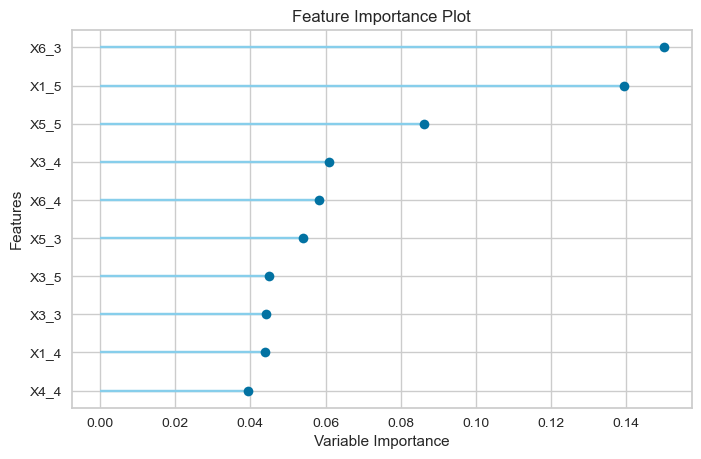

In [16]:
# Check it out, RandomForest did end up performing better after tuning the model.
# Still, not anywhere near our required 73% accuracy standard.
# Leet's look at the most important features.
plot_model(tuned_rf, plot='feature')

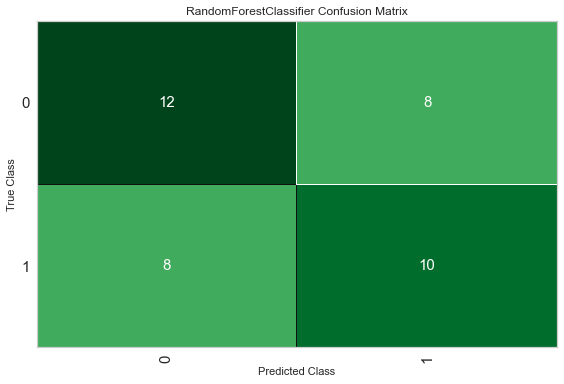

In [17]:
plot_model(tuned_rf, plot='confusion_matrix')

Alright, we didn't find much success with PyCaret. However, we can use the insight from PyCaret to focus on which models we want to implement through sklearn for a more manual approach.

In [18]:
# Import necessary functions from Scikit Learn.
# We will split the data into a train test set, set up at least 5 fold for bootstrapping,
# and then test the trained model on the somewhat dismall test data.

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn import tree, metrics

X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
y = df['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [19]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(random_state=123)
)

rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.42105263, 0.63157895, 0.57894737, 0.52631579, 0.61111111])

In [20]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.5538011695906433, 0.07529112018447291)

In [21]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'randomforestclassifier__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
}
grid_params

{'randomforestclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(copy=True, with_mean=True, with_std=True),
  None]}

In [22]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [23]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                   

In [24]:
rf_grid_cv.best_params_

{'randomforestclassifier__n_estimators': 10, 'standardscaler': None}

In [25]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores, np.mean(rf_best_scores), np.std(rf_best_scores)

(array([0.63157895, 0.47368421, 0.73684211, 0.52631579, 0.77777778]),
 0.6292397660818713,
 0.11699414678520409)

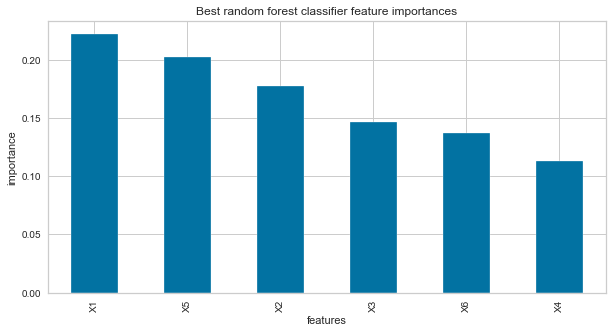

In [26]:
# This will output the most important features for forecasting Y
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestclassifier.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest classifier feature importances');

Seems like the answers for question 1, 5 and 2 are most important for predicting if our customer is happy.

In [53]:
# Time to write the actual classifier. Using our 'best_params_' from above to choose the number of estimators.
# We fit the model to the train data, call it to predict using the X_test, and store that as the Y Predictions.
# Then, we compare the y_pred with the actual y_test values.
forest=RandomForestClassifier(max_depth= 10, n_estimators=10, random_state=123)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_pred = pd.Series(y_pred)

from sklearn.metrics import classification_report, confusion_matrix
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred,output_dict=True)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" %(result2*100.00))

Confusion Matrix:
[[ 7 11]
 [ 2 12]]
Classification Report:
{'0': {'precision': 0.7777777777777778, 'recall': 0.3888888888888889, 'f1-score': 0.5185185185185185, 'support': 18}, '1': {'precision': 0.5217391304347826, 'recall': 0.8571428571428571, 'f1-score': 0.6486486486486486, 'support': 14}, 'accuracy': 0.59375, 'macro avg': {'precision': 0.6497584541062802, 'recall': 0.623015873015873, 'f1-score': 0.5835835835835835, 'support': 32}, 'weighted avg': {'precision': 0.6657608695652174, 'recall': 0.59375, 'f1-score': 0.5754504504504504, 'support': 32}}
Accuracy: 59.38%


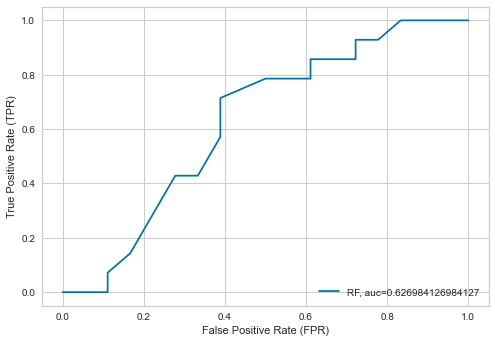

In [54]:
# I figured this would be the result, we just don't have a substantial enough test data set.
# Our AUC-ROC score will reflect this with a 'stairs' shap rather than a curve:
y_pred_proba = forest.predict_proba(X_test)[::,1]
fpr, tpr, _=metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='RF, auc='+str(auc))
plt.xlabel(xlabel='False Positive Rate (FPR)')
plt.ylabel(ylabel='True Positive Rate (TPR)')
plt.legend(loc=4)
plt.show()

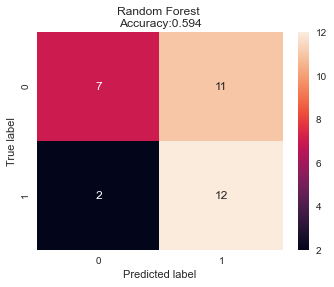

In [55]:
# Our model is actually correctly classifying customer happiness (True Negative [bottom right]), 
# but not doing great with customer unhappiness (True Positive [top left]). We care more about predicting unhappy
# customers in order to try to change their attitude and retain their business.
plt.figure(figsize=(5.5,4))
sns.heatmap(result, annot=True, fmt="d")
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<AxesSubplot:>

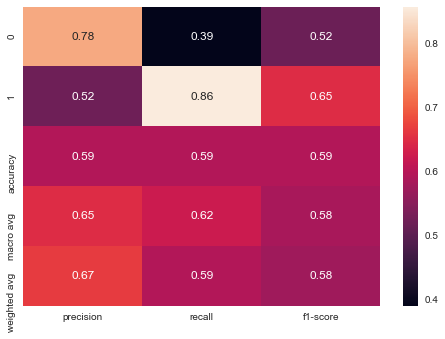

In [56]:
# Let's look at the Precision, Recall, F1-Score.
sns.heatmap(pd.DataFrame(result1).iloc[:-1, :].T, annot=True)

In [57]:
# Let's see what the accuracy on the training data was compared to our test data.
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.947
Accuracy on test set: 0.594


All right, so the model is great in the training data, but really struggles with the limited test data.

In [61]:
# Can XGBoost do better? 
from xgboost import XGBClassifier
XGB =XGBClassifier()
XGB.fit(X_train, y_train)
print(XGB)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [62]:
y_pred = XGB.predict(X_test)
predictions = [round(value) for value in y_pred]

In [63]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy*100))

Accuracy: 50.00%


Nope, not even XGBoost is able to succeed with the limited test data.

I was encouraged to try out LazyPredict. Let's see if it performs any better.

In [64]:
from lazypredict.Supervised import LazyClassifier

# On the LazyPredict documentation they set the treain_test_split to 50/50. Let's try it out and see how it performs.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

# Assign classifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:00<00:00, 56.97it/s]


                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.63               0.61     0.61      0.61   
DecisionTreeClassifier             0.60               0.59     0.59      0.60   
XGBClassifier                      0.60               0.59     0.59      0.59   
BaggingClassifier                  0.57               0.56     0.56      0.57   
NuSVC                              0.57               0.56     0.56      0.56   
KNeighborsClassifier               0.57               0.55     0.55      0.56   
SGDClassifier                      0.56               0.55     0.55      0.56   
AdaBoostClassifier                 0.56               0.54     0.54      0.55   
LGBMClassifier                     0.54               0.53     0.53      0.53   
DummyClassifier                    0.52               0.51     0.51      0.52   
LogisticRegression          

Looks like LazyPredict performs as well as PyCaret. For the sake of trying, I will bring in Logistic Regression from scikit learn.

In [65]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.628
Accuracy on test set: 0.438


Logistic regression failed as well. 